## Self Organizing Maps (SOMs)

#### Step 1 : Loading Utilities and Dataset

In [7]:
# Loading Utlities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
# Loading dataset
dataset = pd.read_csv("C:/Users/tze/OneDrive/Deep Learning/Self_Organizing_Maps/Credit_Card_Applications.csv")
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


#### Feature Extraction

In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

#### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)

#### Training SOM

In [11]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15,
              sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(X, 100)

#### Visualization

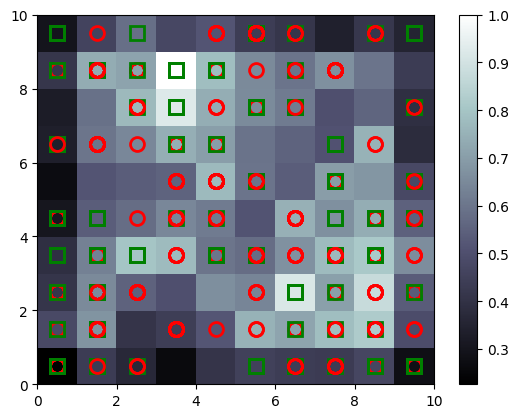

In [25]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['red', 'green']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5,
         markers[y[i]], 
         markeredgecolor  = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10, markeredgewidth = 2)
show()

#### Detecting Frauds

In [35]:
maps = som.win_map(X)
frauders = np.concatenate((maps[(7,1)], maps[(1,8)], maps[(8,1)], maps[(8,2)]), axis=0)
potential  = scaler.inverse_transform(frauders)